### Postać rozwiązania

Nasze rozwiązanie będzie miało postać wektorów wierzchołków grafu ułożonych w kolejności odwiedzania przypisanych do poszczególnych dronów:<br>
<center>
$d_{1}=(1,3,5...)$<br>
$d_{2}=(2,7,9...)$<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
$d_{M}=(10,15,4...)$<br>
   </center>
M - ilość wymaganych dronów

### Funkcja celu

\begin{equation*}
F=min (\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} \sum \limits _{j=0} ^{N} c_{ij} x_{vij} + \alpha (M-D))
\end{equation*}

gdzie:
<ul>
    <li>$M$ – liczba dronów
    <li>$N$ – liczba odbiorców
    <li>$c_{ij}$ – koszt(czas) przejazdu od odbiorcy $i$ do odbiorcy $j$
    <li>$x_vij$ – zmienna decyzyjna która określa czy dron $v$ wykonuje trase od $i$ do $j$
    <li>$x_{vij} = \left\{
            \begin{array}{ll}
                1 & \mbox{gdy realizowany jest kurs od i do j przez drona v}\\
                0 & \mbox{w przeciwnym przypadku}
            \end{array}
        \right. 
        $
    <li>$\alpha$ – Współczynnik kary
    <li>$D$ – Liczba dronów w posiadaniu 
</ul>                  

### Ograniczenia
Jeśli $ x_{vij} = 1 \Rightarrow  u_{i} + q_{vj} = u_{j}$</br>

<center>$ q_{vi} \leq u_{i} \leq Q \quad \forall_{i} \in_{1, 2,..., N} $</center>

<!-- \begin{equation*}
\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} y_{iv} \leq Q
\end{equation*}
\begin{equation*}
\sum \limits _{i=0} ^{N} y_{iv} \leq Q \quad }
\end{equation*}
 -->
$ q_{vi} $ – wielkość zapotrzebowania dostarczana do $i$-tego klienta przez $v$-tego drona

$Q $ – ładowność drona


### Struktury danych potrzebnych do algorytmu

> Macierz dystansów od poszczególnych odbiorców

\begin{equation*}
M_{i,j} = 
\begin{pmatrix}
d_{1,1} & d_{1,2} & \cdots & d_{1,n} \\
d_{2,1} & d_{2,2} & \cdots & d_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
d_{i,1} & d_{i,2} & \cdots & d_{i,j} 
\end{pmatrix}
\end{equation*}

gdzie:
<ul>
    <li>$i, j$ - identyfikatory poszczególnych odbiorców</li>
    <li>$d_{i,j}$ - dystans pomiędzy odbiorcami $i, j$</li>
    <li>dystans - odległość euklidesowa $d_{i,j} = \sqrt{(x_{i}-x_{j})^{2}+(y_{i}-y_{j})^{2}}$
</ul>

> Lista położenia poszczególnych odbiorców

<center>$ L_{i} = a_{1}, a_{2},... a_{i} $</center>

gdzie:
<ul>
    <li>$a_{i}$ - koordynaty $i - tego$ odbiorcy $(x_{i}, y_{i})$</li>
</ul>


> Ilość dronów - M

> Ładowność drona - Q

> Ilość odbiorców - N




In [36]:
import numpy as np
import random
from matplotlib import pyplot as plt
import copy

class Client:
    """
    Odbiorca
        id: Identyfikator odbiorcy
        x, y: Koordynaty odbiorcy
    """
    def __init__(self, id, x, y):
        self.id = id
        self.x, self.y = x, y
        
    def __repr__(self):
        return f'Client ({self.x}, {self.y})'
    
    def get_distance_from(self, point):
        return np.sqrt((point.x-self.x)**2 + (point.y-self.y)**2)

class Drone:
    """
    Dron
        id: Identyfikator drona
        x, y: Koordynaty drona
        velocity:  Prędkość drona 60km/h = 1km/min
        num_of_packages: Ilość paczek - Q
    """
    def __init__(self, id, capicity):
        self.id = id
        self.capicity = capicity
        self.num_of_packages = capicity
        self.temp_client_id = None
        self.x, self.y = 0, 0
        self.x_client, self.y_client = None, None
        self.x_prev_client, self.y_prev_client = None, None
        
    def __repr__(self):
        return '(Drone {}, Capicity: {})'.format(self.id, self.num_of_packages)

    def change_position(self, x, y):
        """
        Zmiana pozycji drona
        """
        self.x, self.y = x, y
    
    def get_distance_from_client(self):
        """
        Odległość euklidesowa
        """
        return np.sqrt((self.x_client-self.x)**2 + (self.y_client-self.y)**2)
    
    def deliver_package(self):
        """
        Dostarczanie paczki
        """
        self.num_of_packages -= 1
        self.x_prev_client = self.x_client
        self.y_prev_client = self.y_client
        if self.num_of_packages == 0:
            self.temp_client_id = None
            self.x_client = 0
            self.y_client = 0
        else:
            self.temp_client_id = None
            self.x_client = None
            self.y_client = None

    def load_packages(self):
        """ 
        Załadowanie drona
        """
        self.num_of_packages = self.capicity
    
    def specify_client(self, client):
        """
        Przypisanie klienta do drona
        """
        if self.temp_client_id == None:
            self.temp_client_id = client.id
            self.x_client = client.x
            self.y_client = client.y
    
    def travel(self):
        """
        Przemieszczanie się drona
        """
        if self.x_client is not None and self.y_client is not None:
            distance = self.get_distance_from_client()
            if (distance <= 1):
                if self.x_client == 0 and self.y_client == 0:
                    self.load_packages()
                self.x = self.x_client
                self.y = self.y_client
                self.deliver_package()
            else:
                w = abs(self.x - self.x_client)
                h = abs(self.y - self.y_client)
                sin_alpha = h/distance
                sin_beta = w/distance
                if (self.x >= self.x_client and self.y >= self.y_client):
                    self.change_position(self.x - sin_beta, self.y - sin_alpha)
                if (self.x <= self.x_client and self.y <= self.y_client):
                    self.change_position(self.x + sin_beta, self.y + sin_alpha)
                if (self.x >= self.x_client and self.y <= self.y_client):
                    self.change_position(self.x - sin_beta, self.y + sin_alpha)
                if (self.x <= self.x_client and self.y >= self.y_client):
                    self.change_position(self.x + sin_beta, self.y - sin_alpha)

class WithVisualisation:
    """
    Visualisation
        drones: Wszyskie dostępne drony. Ilość - M
        clients: Nieodwiedzeni odbiorcy
        x_visited, y_visited: Koordynaty odwiedzonych odbiorców
        total_time: Całkowity czas dostarczania paczek
    """
    ##############
    # Still some work to do..
    ##############
    def __init__(self, obj):
        self.drones = obj.drones
        self.clients = obj.clients
        self.solution = obj.solution if obj.solution else obj.generate_first_solution()
        self.total_time = 0
        self.threshold = 1000
        
        self.x_clients, self.y_clients = self._initialize_client_positions(obj.clients)
        self.x_visited, self.y_visited = [], []
        self.x_drones, self.y_drones = [], []
        self.path_colors = ['#ffe000', '#00ffb9', '#070208', '#9b00ff']
    
    @staticmethod
    def _initialize_client_positions(clients):
        """
        Inicjalizacja pozycji odbiorców do dronów
        """
        x_clients, y_clients = [], []
        for c in clients:
            x_clients.append(c.x)
            y_clients.append(c.y)
        return x_clients, y_clients
    
    def update_drone_positions(self):
        """
        Aktualizacja pozycji dronów
        """
        for drone in self.drones:
            self.x_drones.append(drone.x)
            self.y_drones.append(drone.y)
    
    def update_visited_clients(self, x, y):
        """
        Aktualizacja odwiedzonych odbiorców
        """
        self.x_visited.append(x)
        self.y_visited.append(y)
    
    def assign_clients(self):
        """
        Przipisanie odbiorców do wszystkich dronów
        """
        for drone in self.drones:
            if self.solution[drone]:
                drone.specify_client(self.solution[drone].pop(0))
    
    def assign_client(self, drone_id):
        """
        Przipisanie odbiorcy do jednego drona o przekazanym ID
        """
        for drone in self.drones:
            if drone.id == drone_id:
                if self.solution[drone]:
                    drone.specify_client(self.solution[drone].pop(0))
    
    def plot_figure(self):
        fig = plt.figure(figsize=(12,12))
    
    def visualize_solution(self):
        k = 1
        for i in range(self.threshold):
            k = 1 if k == 4 else k + 1
            for drone in self.drones:
                if drone.temp_client_id == None:
                    self.assign_client(drone.id)
                    self.update_visited_clients(drone.x_prev_client, drone.y_prev_client)
                drone.travel()
            self.update_drone_positions()
            plt.plot(self.x_clients, self.y_clients, 'go', markersize=12, label="Odbiorca")
            plt.plot(self.x_drones[-len(self.drones):], self.y_drones[-len(self.drones):], 'm{}'.format(k), markersize=20, label="Dron")
            for j in range(len(self.drones)):
                plt.plot(self.x_drones[j::len(self.drones)], self.y_drones[j::len(self.drones)], self.path_colors[j])
            plt.plot(self.x_visited, self.y_visited, 'ro', markersize=12, linewidth=4, label="Dostarczona paczka")
            plt.plot(0, 0, 'bo-', markersize=14)
            plt.grid()
            plt.ylim(-30, 30)
            plt.xlim(-30, 30)
            plt.title(f'Akutalny czas dostarczania paczek w minutach: {i+1}')
            plt.legend()
            plt.draw()
            plt.pause(0.05)
            plt.cla()
        plt.show()
    
    def plot_solution(self):
        for d in self.drones:
            x_s, y_s = zip(*[(point.x, point.y) for point in self.solution[d]]) 
            plt.plot(x_s, y_s, label=f'{d}')
        plt.plot(self.x_clients, self.y_clients, 'ro', markersize=12, label="Odbiorca")
        plt.plot(0, 0, 'bo', markersize=12, label="Baza")
        plt.grid()
        plt.legend()
        plt.ylim(-30, 30)
        plt.xlim(-30, 30)
        plt.show()

class TabuSearch:
    
    def __init__(self, num_of_drones=3, drone_capacity=4, num_of_clients=12, clients_file=None):
        self.M = num_of_drones
        self.Q = drone_capacity
        self.N = num_of_clients
        self.drones = self._create_drones(num_of_drones, drone_capacity)
        self.clients = self._initialize_clients(clients_file, num_of_clients)
        self.distance_matrix = self._create_distance_matrix()
        
        self.best_solution = None
        self.solution = None
        self.best_cost = 0
        
    def __repr__(self):
        return f'Tabu search for:\n\nClients: {self.clients}\n\nDrones: {self.drones}\n\nSolution: {self.solution}'
    
    @staticmethod
    def _create_drones(num_of_drones, drone_capacity):
        drones = [Drone(i+1, drone_capacity) for i in range(num_of_drones)]
        return drones
    
    @staticmethod
    def _read_clients_from_file(file_name):
        test_clients = np.loadtxt(file_name, delimiter=',', dtype=int)
        clients = [Client(*client) for client in test_clients]
        return clients
    
    @staticmethod
    def _create_new_client_samples(file_name, num_of_clients):
        clients = []
        with open(file_name, 'w') as file:
            for i in range(num_of_clients):
                x_pos, y_pos = 0, 0
                while y_pos == 0 and x_pos == 0:
                    x_pos = random.randint(-25,25)
                    y_pos = random.randint(-25,25)
                file.write(f'{i+1},{x_pos},{y_pos}\n')
                clients.append(Client(i+1, x_pos, y_pos))
        return clients
    
    def _initialize_clients(self, file_name, num_of_clients):
        if file_name:
            try:
                clients = self._read_clients_from_file(file_name)
            except OSError:
                return self._create_new_client_samples(file_name, num_of_clients)
            if len(clients) < self.N:
                raise Exception('Not enough samples in the file: change num_of_clients param passed to constructor.')
            elif len(clients) > self.N:
                print(f'Number of clients changed to {len(clients)}')
                self.N = len(clients)
                return clients
            return clients
        return self._create_new_client_samples("test_clients.txt", num_of_clients)
    
    def _create_distance_matrix(self):
        distance_matrix = np.zeros((self.N + 1, self.N + 1))
        base = Client(0,0,0)
        for i in range(self.N + 1):
            for j in range(self.N + 1):
                if i != j:
                    if i == 0:
                        distance_matrix[i][j] = distance_matrix[j][i] = self.clients[j-1].get_distance_from(base)
                    else:
                        distance_matrix[i][j] = distance_matrix[j][i] = self.clients[i-1].get_distance_from(self.clients[j-1])
        return distance_matrix
    
    def find_next_drone_to_come_back(self, paths):
        lowest = 100*(2+self.Q-1)
        idx = 0
        for i, d in enumerate(self.drones):
            if d not in paths:
                break
            s = sum(self.distance_matrix[paths[d][i].id][paths[d][i+1].id] for i in range(len(paths[d])-1))
            if s <= lowest:
                idx = i
                lowest = s
        return idx
    
    def generate_first_solution(self):
        paths = {}
        base = Client(0,0,0)
        clients_copy = copy.deepcopy(self.clients)
        for d in self.drones:
            if d.num_of_packages > len(clients_copy):
                break
            paths[d] = [clients_copy.pop() for _ in range(d.num_of_packages)]
            paths[d].insert(0, base)
            
        while clients_copy:
            drone_idx = self.find_next_drone_to_come_back(paths)
            packages = self.Q
            while clients_copy and packages > 0:
                if base in paths[self.drones[drone_idx]][-self.Q:]:
                    paths[self.drones[drone_idx]].append(clients_copy.pop())
                    packages -= 1
                else:
                    paths[self.drones[drone_idx]].append(base)
        self.solution = paths
        return paths

In [37]:
ts1 = TabuSearch(3, 4, 28, "test_1.txt")
ts2 = TabuSearch(7, 3, 34, "test_2.txt")
ts3 = TabuSearch(5, 1, 55, "test_3.txt")

In [38]:
# Need for figure outside jupyter
# %matplotlib qt
# %matplotlib inline
# %matplotlib notebook

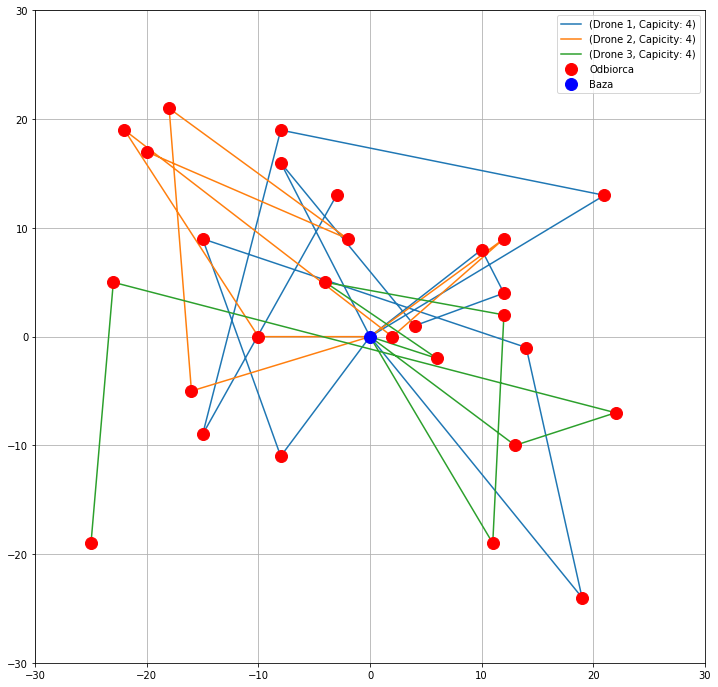

In [39]:
# Plotting generated first solution to 
vis1 = WithVisualisation(ts1)
vis2 = WithVisualisation(ts2)
vis3 = WithVisualisation(ts3)
vis1.plot_figure()
vis1.plot_solution()

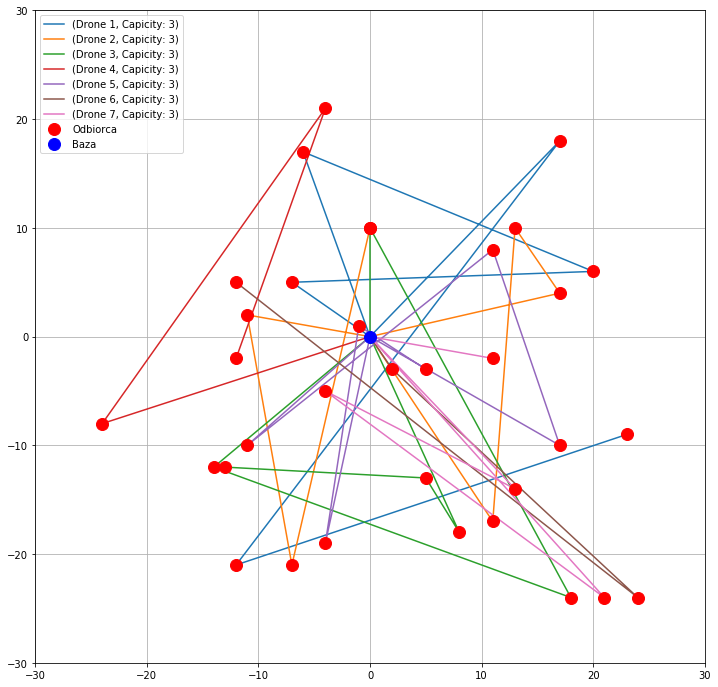

In [40]:
vis2.plot_figure()
vis2.plot_solution()

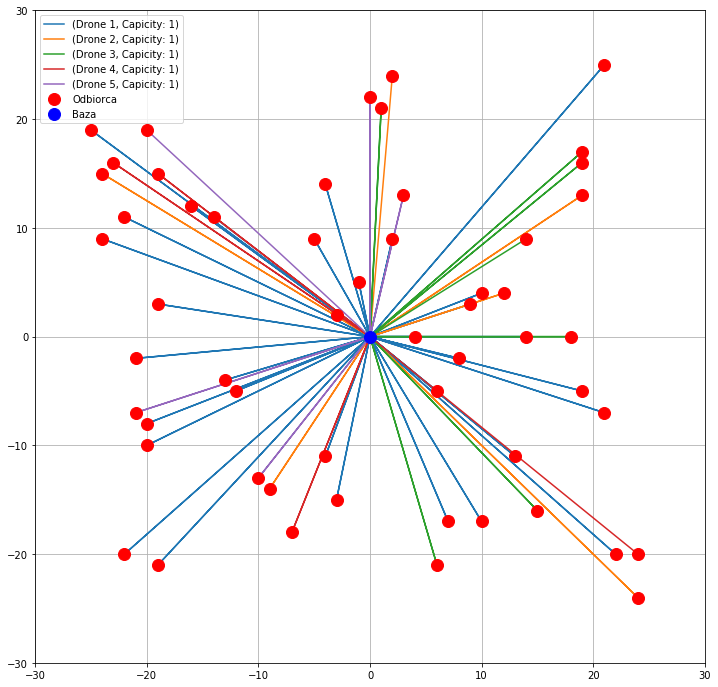

In [41]:
vis3.plot_figure()
vis3.plot_solution()